In [21]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor

#### Q1. Import the BostonHousing.csv file into a .ipython file. Delete the CAT.MEDV variable from the imported data. Partition the data into training (60%) and validation (40%) sets. Use random_state equal to 1.

In [23]:
df = pd.read_csv('BostonHousing.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


<Axes: >

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

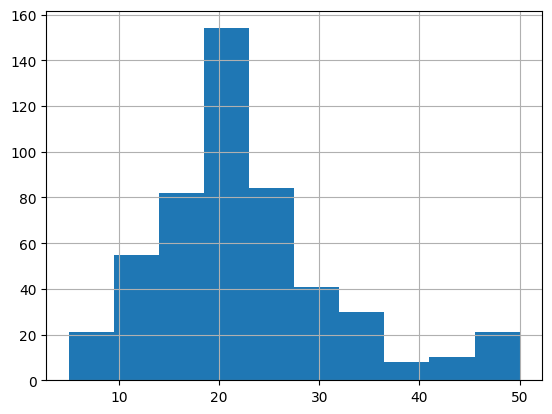

In [24]:
df['MEDV'].hist()
df['MEDV'].describe()

In [25]:
df = df.drop('CAT. MEDV', axis=1)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [26]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

#### Q2. Standardize the training and validation data sets using the StandardScaler() method from the Sci-Kit Learn library.

In [ ]:
numerical_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])

# Normalize training and test sets
X_train_norm = pd.DataFrame(scaler.transform(X_train[numerical_cols]), 
                            columns=numerical_cols, index=X_train.index)
X_test_norm = pd.DataFrame(scaler.transform(X_test[numerical_cols]), 
                           columns=numerical_cols, index=X_test.index)

# As CHAS is a categorical (binary feature) feature, adding it back without scaling
X_train_norm['CHAS'] = X_train['CHAS'].values
X_test_norm['CHAS'] = X_test['CHAS'].values

StandardScaler()

#### Q3. Train a KNN prediction model using k values between 1 and 10, both included. Choose the optimal value of k in this range. 

In [28]:
mse_values = []
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_norm, y_train)
    y_pred = knn.predict(X_test_norm)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Find the optimal k value with the minimum mean squared error
optimal_k = np.argmin(mse_values) + 1
print(f"The optimal k value is: {optimal_k}")

# Print the MSE values for all k values
for k, mse in enumerate(mse_values, 1):
    print(f"k = {k}: MSE = {mse}")

KNeighborsRegressor(n_neighbors=1)

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor()

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=10)

The optimal k value is: 2
k = 1: MSE = 19.87532019704433
k = 2: MSE = 15.944901477832511
k = 3: MSE = 16.95983579638752
k = 4: MSE = 18.923337438423644
k = 5: MSE = 20.150065024630543
k = 6: MSE = 21.91770935960591
k = 7: MSE = 22.702843068261792
k = 8: MSE = 23.06881927339901
k = 9: MSE = 23.63813963388676
k = 10: MSE = 25.31794039408867


#### Q4. What does the optimal value of k represent? Explain.
The optimal value of k in this case is 2, based on the lowest Mean Squared Error (MSE). For Regression Problems we use MSE to evaluate the model. MSE measures the average squared difference between the predicted values and the actual values, indicating how far off the predictions are from the true values.

Explanation in Simple Terms:

1. k is the number of nearest neighbors the model uses to make predictions.
2. The MSE shows how far the model's predictions are from the actual values—the lower the MSE, the better the model.

Why k=2 is optimal:

1. When k=1, the model may be too sensitive and overfit the training data, leading to a higher MSE (19.88).
2. As k increases, the model becomes more generalized and smoother, but at k=2, it has the lowest MSE (15.94), meaning it performs the best.
3. Beyond k=2, the MSE starts to increase again, showing that using more neighbors (like k=5, 6, or 10) leads to worse predictions.

In summary:
    The optimal value of k represents the best balance between making accurate predictions and not overfitting or underfitting the model. In this case, k=2 gives the lowest error, meaning it provides the best performance.

#### Q5. Predict the MEDV for a tract with the following information using the best k.

In [29]:
df_new = pd.DataFrame([{'CRIM': 0.2, 'ZN': 0, 'INDUS': 7, 'CHAS': 1, 'NOX': 0.538, 'RM': 6, 'AGE': 35, 'DIS': 5, 'RAD': 4, 'TAX': 200, 'PTRATIO': 21, 'LSTAT': 20}])

df_new_norm = pd.DataFrame(scaler.transform(df_new[numerical_cols]), 
                           columns=numerical_cols, index=df_new.index)

df_new_norm['CHAS'] = df_new['CHAS'].values

In [30]:
# Re-run kNN with k=2 using all observations
knn_final = KNeighborsRegressor(n_neighbors=2)
knn_final.fit(X_train_norm, y_train)
y_pred_final = knn_final.predict(X_test_norm)

# Evaluate the final model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Model Performance:")
print(f"R-squared: {r2_final}")

# Predict the new data point using the final model
df_new_prediction = knn_final.predict(df_new_norm) 
print(f"\nPrediction for new data point: {df_new_prediction}")

KNeighborsRegressor(n_neighbors=2)

Final Model Performance:
R-squared: 0.8234479324277865

Prediction for new data point: [22.3]
